In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay
)

In [13]:
# --- 1. Data Loading and Preparation ---

file_path = "heart_disease_uci.csv" 

print(f"--- 1. Loading data from {file_path} ---")
df = pd.read_csv(file_path)

print("\nOriginal Data Shape:", df.shape)

--- 1. Loading data from heart_disease_uci.csv ---

Original Data Shape: (920, 16)


In [15]:
# --- 2. Data Cleaning ---
# Dropping columns that are identifiers, not features
df = df.drop(['id', 'dataset'], axis=1)

# Handling missing data: drop all rows with any missing value
df_cleaned = df.dropna()
print("Data Shape after dropping NA:", df_cleaned.shape)

Data Shape after dropping NA: (299, 14)


In [17]:
# --- 3. Feature Engineering ---
# One-hot encode all 'object' type columns (categorical features)
df_processed = pd.get_dummies(df_cleaned, drop_first=True)

# Convert the target 'num' to binary (0 = no disease, 1 = disease)
df_processed['target'] = df_processed['num'].apply(lambda x: 1 if x > 0 else 0)
df_processed = df_processed.drop('num', axis=1) 

print("\nTarget variable value counts after making it binary:")
print(df_processed['target'].value_counts())


Target variable value counts after making it binary:
target
0    160
1    139
Name: count, dtype: int64


In [19]:
# --- 4. Model Training ---

X = df_processed.drop('target', axis=1)
y = df_processed['target']

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


Training set size: 239 samples
Test set size: 60 samples


LogisticRegression(max_iter=1000)


--- 5. Model Evaluation ---
Accuracy: 90.00%
ROC-AUC Score: 0.9417

Plotting Confusion Matrix...


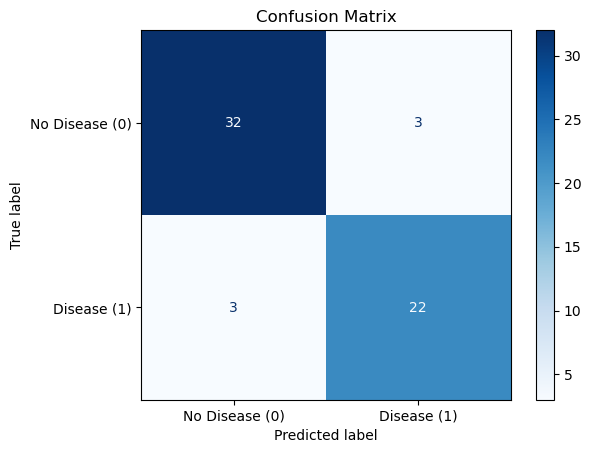

In [21]:
# --- 5. Model Evaluation ---

y_pred = model.predict(X_test_scaled)

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print("\n--- 5. Model Evaluation ---")
print(f"Accuracy: {accuracy * 100:.2f}%")

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.4f}")

print("\nPlotting Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease (0)', 'Disease (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Plotting ROC Curve...


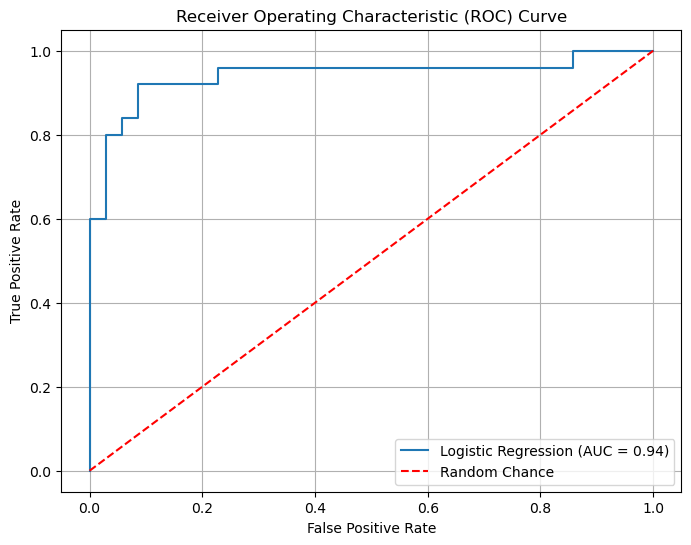

In [23]:
print("Plotting ROC Curve...")
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


--- 6. Feature Importance ---

Top Features by Importance:
                   Feature  Importance  Absolute Importance
5                       ca    1.094421             1.094421
8           cp_non-anginal   -0.793049             0.793049
6                 sex_Male    0.688971             0.688971
9        cp_typical angina   -0.519498             0.519498
13              exang_True    0.449604             0.449604
4                  oldpeak    0.438668             0.438668
17  thal_reversable defect    0.401967             0.401967
1                 trestbps    0.370267             0.370267
14              slope_flat    0.344749             0.344749
3                   thalch   -0.323166             0.323166


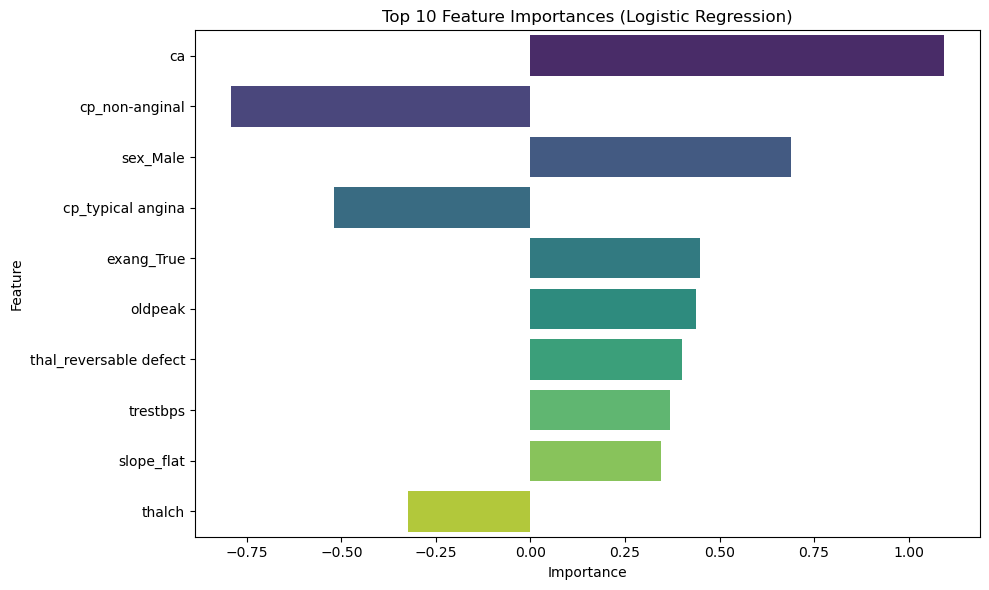

In [25]:
# --- 6. Feature Importance ---
print("\n--- 6. Feature Importance ---")

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

print("\nTop Features by Importance:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Logistic Regression)')
plt.tight_layout()
plt.show()